In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
import scipy.stats
import seaborn as sbn
import pickle
from modules.utils import to_latex_table

In [2]:
FIGSIZE = (14, 8)

# Salary Trend

### About data

Found at dansk statistik, statistik banken: https://www.statistikbanken.dk/statbank5a/default.asp?w=2560
-> I cant get the exact url for the table:

The data is called LONS50:

values chosen are:

also 'sektorer i alt' should be marked

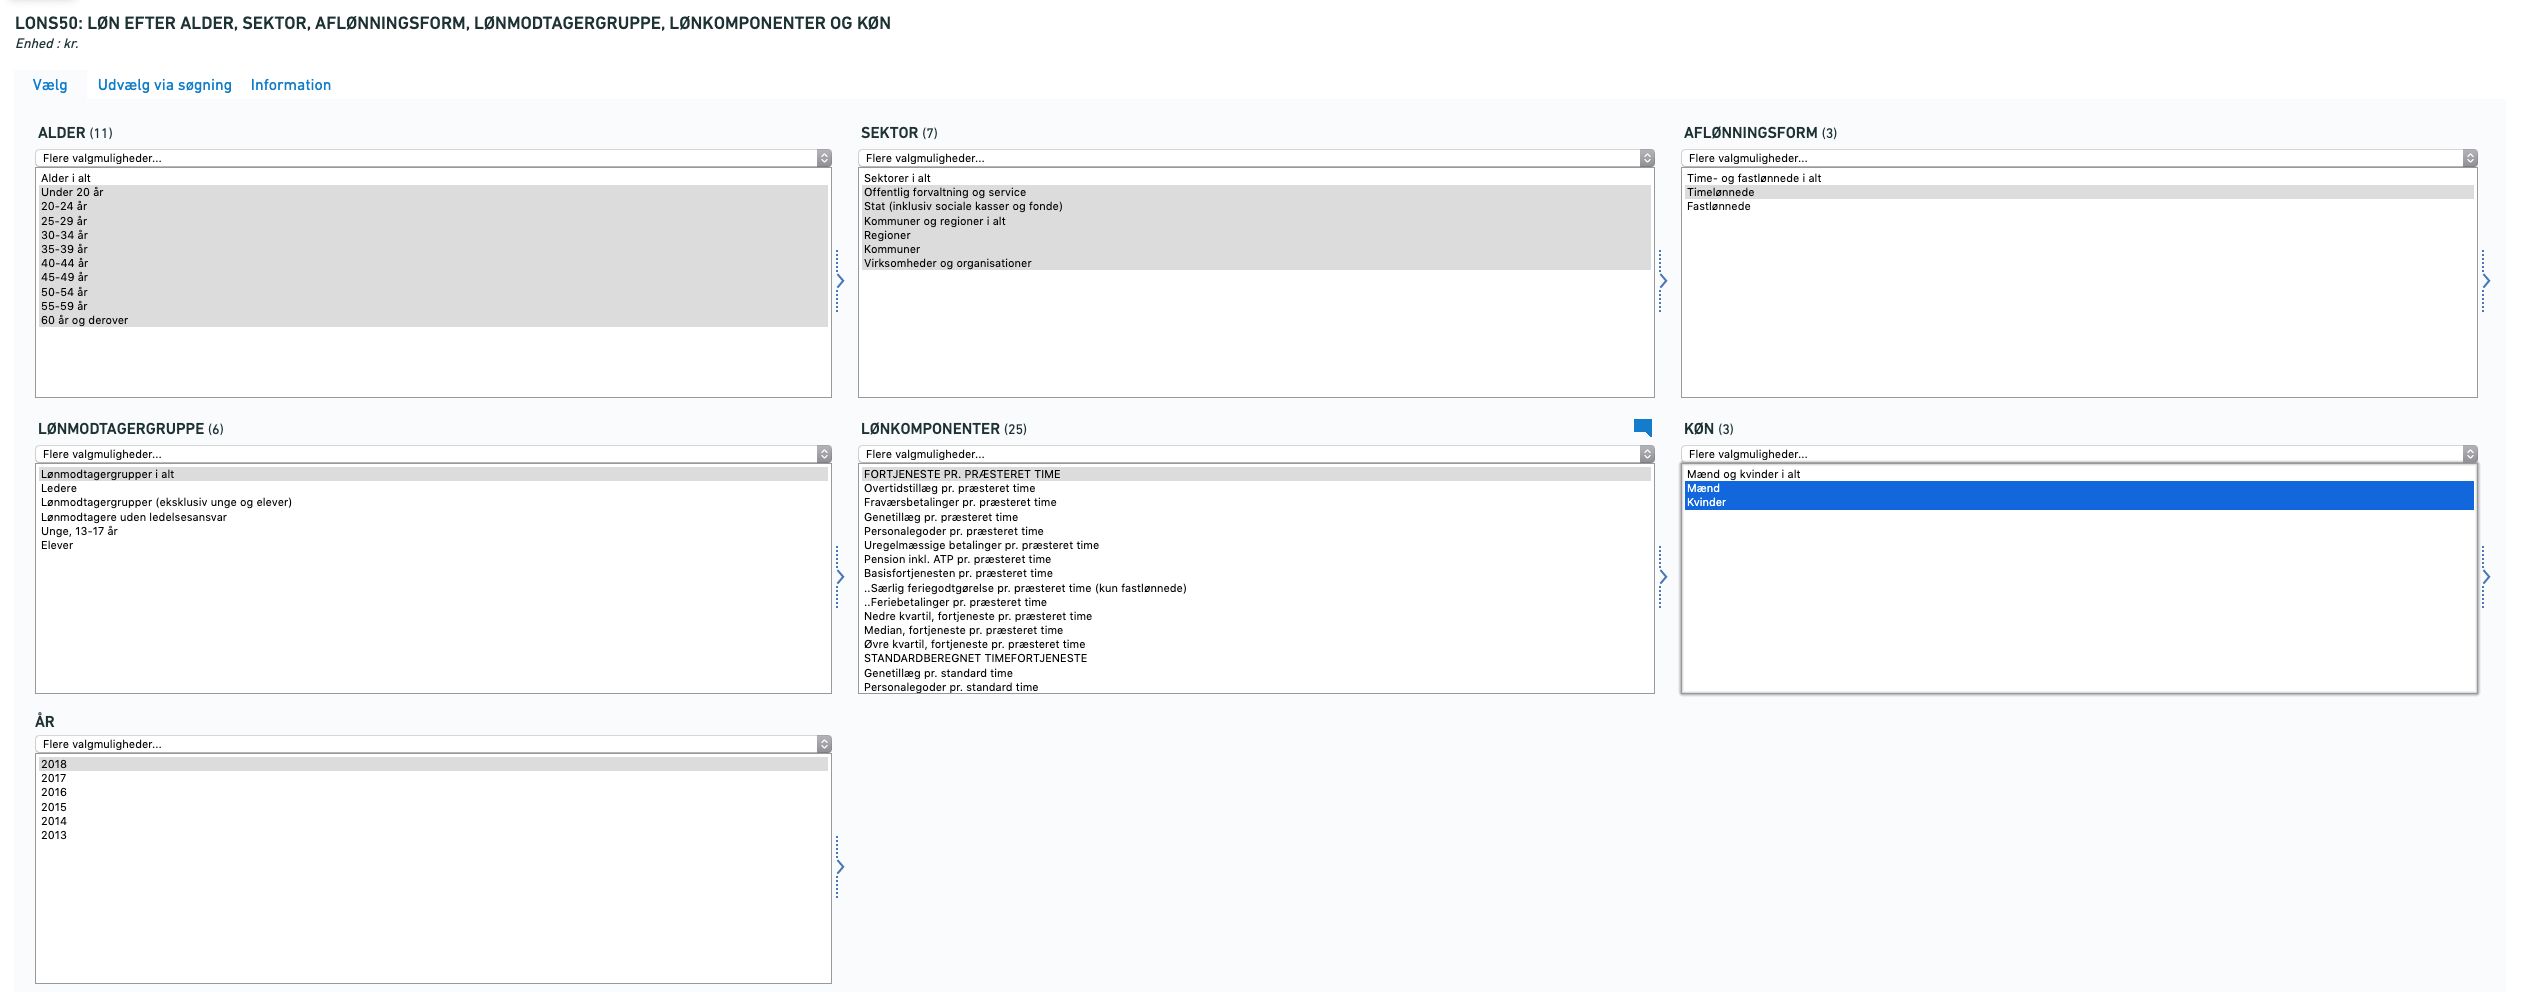

### Getting columns

In [3]:
def remove_bad_headers(x):
    if (x[0:2] != " .") and  (x != ' '):
        return True
    else:
        return False
        
def get_bad_headers(x):
    
    return 1 - remove_bad_headers(x)

In [4]:
header_raw = pd.read_csv('..//data//LONS50_women.csv', encoding='latin-1', skiprows=3, skipfooter=25, sep=';')
header_clean = list(filter(remove_bad_headers, header_raw))
bad_cols = list(filter(get_bad_headers, header_raw))

/Users/Jeppe/.local/share/virtualenvs/speciale-P26n6twt/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
header_clean

['Sektorer i alt',
 'Offentlig forvaltning og service',
 'Stat (inklusiv sociale kasser og fonde)',
 'Kommuner og regioner i alt',
 'Regioner',
 'Kommuner',
 'Virksomheder og organisationer']

In [6]:

def floatify(x):
    try:
        return float(x)
    except:
        return np.nan

def clean_df(df_raw):
    
    # convoluted code to get the right columns
    _cols = {k: [k] for k in list(df_raw.columns)}

    df_tmp = pd.DataFrame(_cols)
    df_tmp = df_tmp.append(df_raw)

    df_tmp.columns = list(header_raw)
    df_tmp['age_group'] = df_tmp[' .5']

    df_tmp = df_tmp.drop(bad_cols, axis=1)
    
    for col in df_tmp.columns:
        if not col == 'age_group':
            df_tmp[col] = df_tmp[col].apply(floatify)
    return df_tmp 
    


In [7]:
df_women_raw = pd.read_csv('..//data//LONS50_women.csv', encoding='latin-1', skiprows=9, skipfooter=9, sep=';', index_col=False)
df_women = clean_df(df_women_raw)


/Users/Jeppe/.local/share/virtualenvs/speciale-P26n6twt/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
df_women

,Sektorer i alt,Offentlig forvaltning og service,Stat (inklusiv sociale kasser og fonde),Kommuner og regioner i alt,Regioner,Kommuner,Virksomheder og organisationer,age_group
0,127.39,184.85,NaN,185.61,NaN,185.87,123.72,Under 20 år
0,176.44,193.25,167.70,194.18,198.61,193.69,173.33,20-24 år
1,197.94,210.68,184.24,213.30,221.54,211.67,196.43,25-29 år
2,212.67,218.46,191.06,221.14,243.90,217.31,212.17,30-34 år
3,217.00,222.28,188.34,226.47,269.59,218.77,216.58,35-39 år
4,222.49,229.69,188.93,237.13,287.23,228.51,221.92,40-44 år
5,225.68,236.68,194.25,242.73,290.50,232.49,224.92,45-49 år
6,227.01,237.07,192.60,245.29,297.61,234.58,226.22,50-54 år
7,226.66,241.07,189.16,252.81,304.41,240.19,225.31,55-59 år
8,231.59,255.49,193.04,264.14,305.50,251.45,227.28,60 år og derover


In [9]:
df_men_raw = pd.read_csv('..//data//LONS50_men.csv', encoding='latin-1', skiprows=9, skipfooter=9, sep=';', index_col=False)
df_men = clean_df(df_men_raw)


/Users/Jeppe/.local/share/virtualenvs/speciale-P26n6twt/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [10]:
df_men

,Sektorer i alt,Offentlig forvaltning og service,Stat (inklusiv sociale kasser og fonde),Kommuner og regioner i alt,Regioner,Kommuner,Virksomheder og organisationer,age_group
0,125.95,195.47,NaN,198.25,NaN,199.38,124.66,Under 20 år
0,202.54,205.59,177.23,208.02,196.50,209.18,202.41,20-24 år
1,238.36,214.31,197.64,217.60,219.16,217.33,238.83,25-29 år
2,250.23,226.16,205.09,230.52,NaN,230.24,250.48,30-34 år
3,258.14,229.13,NaN,237.72,NaN,235.83,258.35,35-39 år
4,263.03,237.35,NaN,245.16,NaN,236.50,263.21,40-44 år
5,265.47,237.99,195.30,250.59,NaN,242.71,265.68,45-49 år
6,262.06,228.57,194.60,244.58,NaN,237.94,262.33,50-54 år
7,258.16,231.27,198.26,254.56,NaN,248.05,258.42,55-59 år
8,250.69,230.44,193.76,253.38,260.78,250.95,251.05,60 år og derover


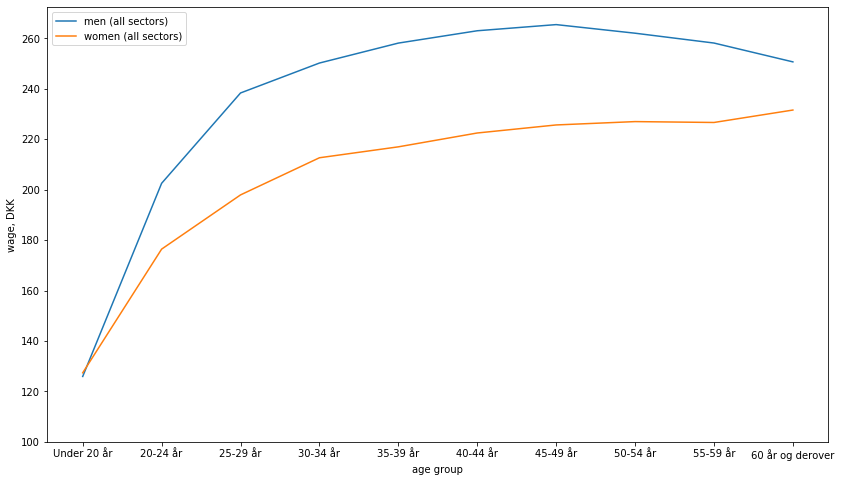

In [11]:
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.plot(df_men['age_group'], df_men['Sektorer i alt'], label='men (all sectors)')
ax.plot(df_women['age_group'], df_women['Sektorer i alt'], label='women (all sectors)')
ax.set_ylim(100)
ax.set_xlabel('age group')
ax.set_ylabel('wage, DKK')
ax.legend()

### saving the figure
f.savefig('..//figures//wage_trend_lons50.png')

In [13]:
def get_interpolation(df):
    
    ys = [120] + list(df['Sektorer i alt']) + [250, 200]
    xs = [18, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 80 ]
    f = interp1d(xs, ys, kind='linear', fill_value = 'extrapolate')
    

    
    ages = list(range(90))
    wages = f(ages)
    
    for ix in range(wages.size):
        if wages[ix] < 120:
            wages[ix] = 120
        
    return np.array(wages)    

In [14]:
men_wages = get_interpolation(df_men)
women_wages = get_interpolation(df_women)

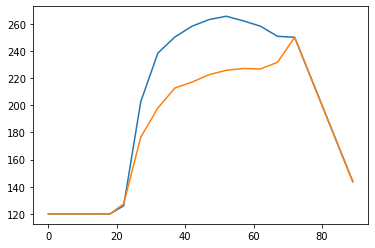

In [15]:
plt.plot(men_wages)
plt.plot(women_wages)

In [16]:
def _saver(array, fname):
    with open(fname, mode='wb') as f:
        pickle.dump(array, f)
        
def save_salary_data(array, sex):
    
    
    if sex=='men':
        fname = '..//data//men_salary_mean.pkl'
        _saver(array, fname)
    elif sex=='women':
        fname = '..//data//women_salary_mean.pkl'
        _saver(array, fname)
    else:
        raise Exception('sex shoud be either men or women')
        

In [17]:
save_salary_data(men_wages, 'men')
save_salary_data(women_wages, 'women')

In [18]:
with open('..//data//women_salary_mean.pkl', mode='rb') as f:
    _wages = pickle.load(f)

### Variation of salary

About data:

Found at danmarks statistik

db = LONS20

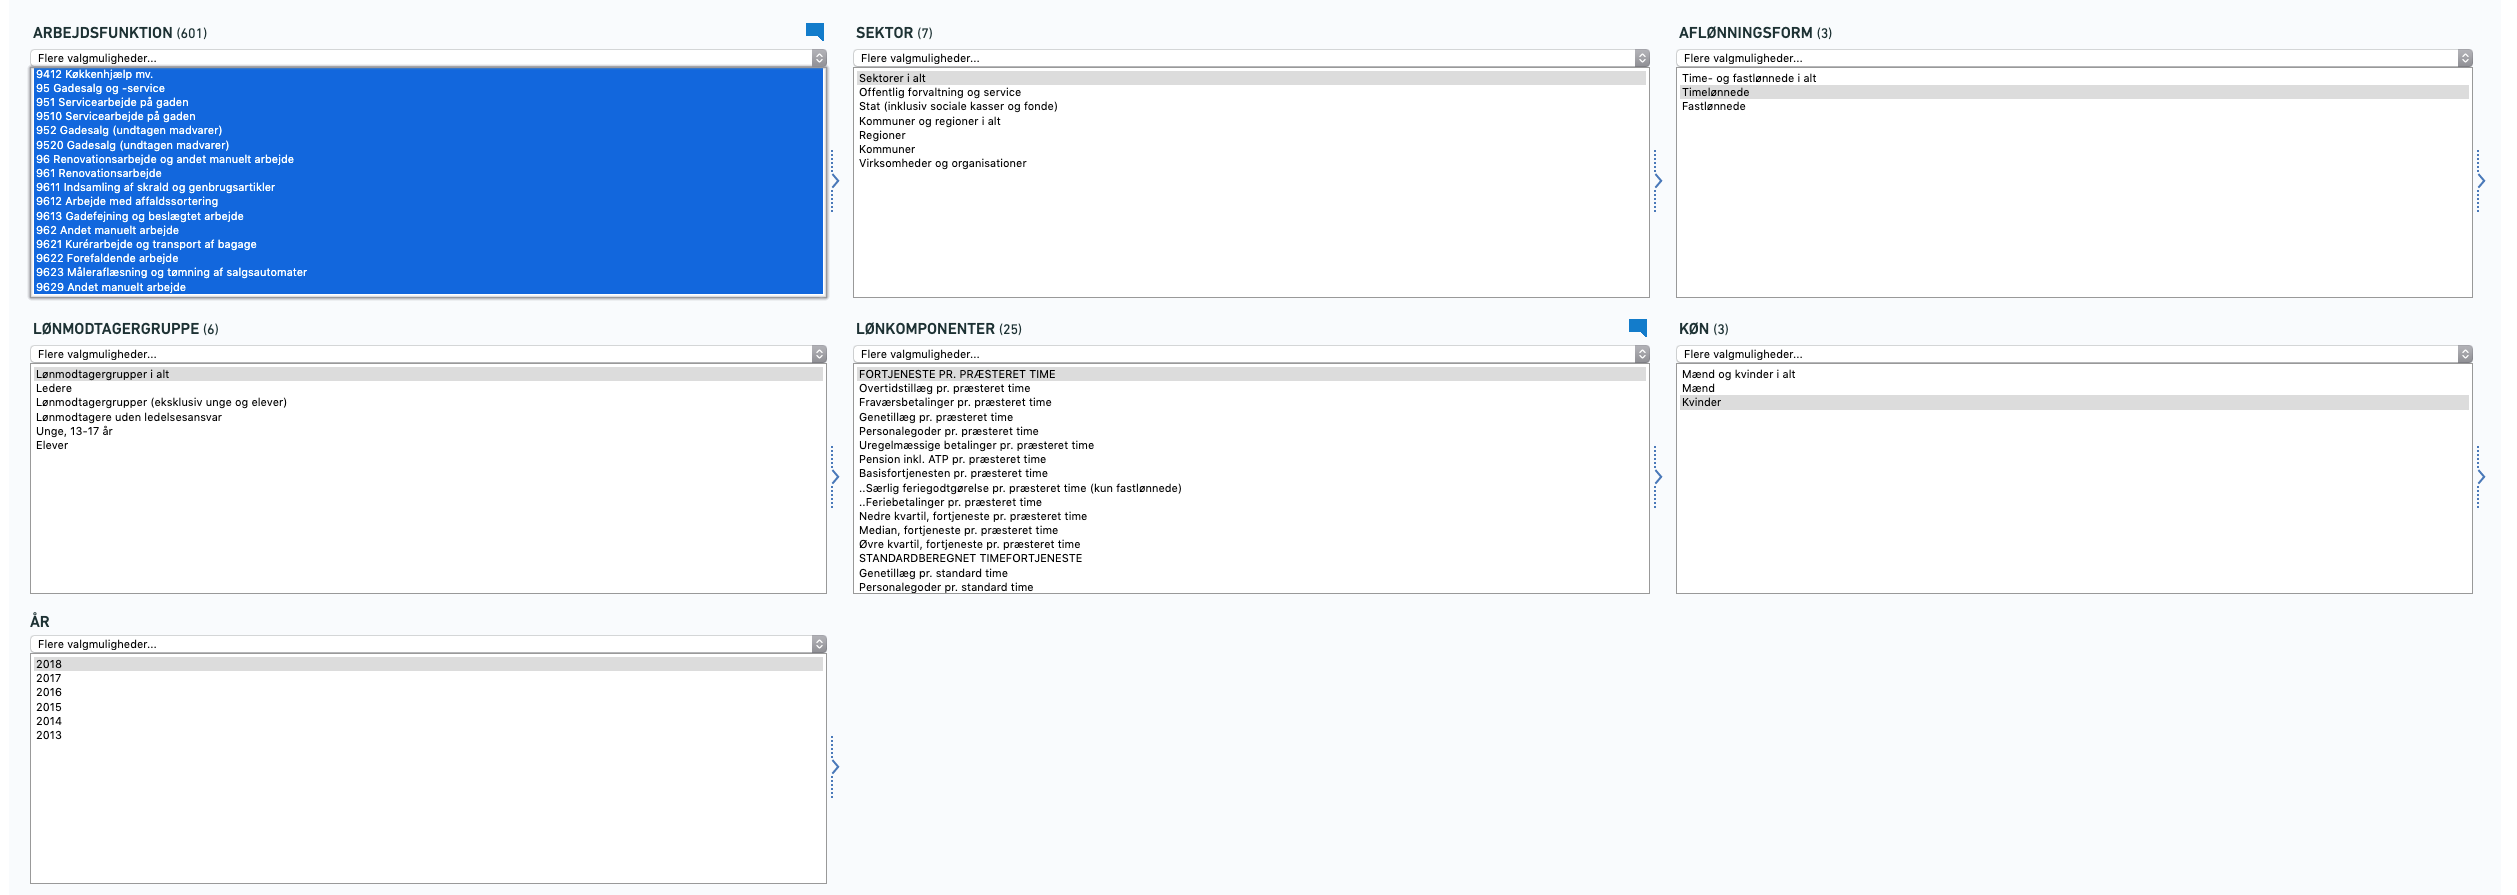

In [19]:
men_salary_variation_raw = pd.read_csv('..//data//LONS20_men.csv', encoding='latin-1',sep=';', header=None)
men_salary_variation_raw.columns = ['sex', 'type', 'group', 'hourly payed', 'part of economy', 'work', 'wage']


In [20]:
women_salary_variation_raw = pd.read_csv('..//data//LONS20_women.csv', encoding='latin-1',sep=';', header=None)
women_salary_variation_raw.columns = ['sex', 'type', 'group', 'hourly payed', 'part of economy', 'work', 'wage']

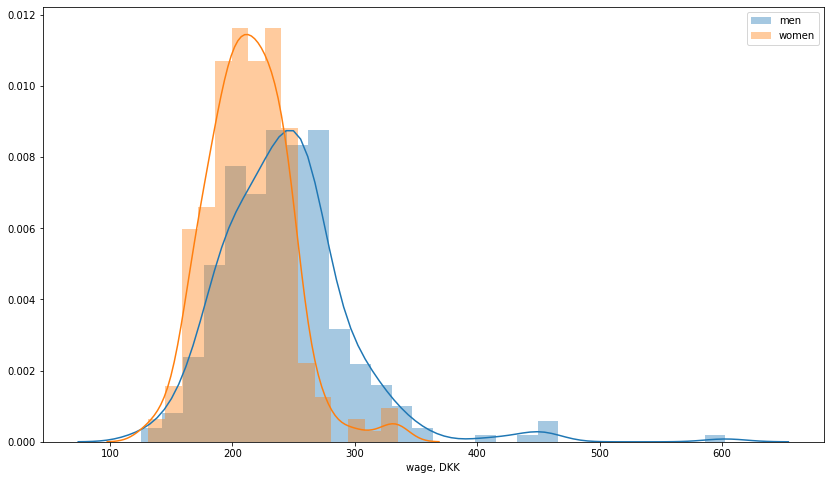

In [21]:
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax = sbn.distplot(men_salary_variation_raw['wage'].apply(floatify).dropna(), label='men')
ax = sbn.distplot(women_salary_variation_raw['wage'].apply(floatify).dropna(), label='women')
ax.set_xlabel('wage, DKK')
ax.legend()
### saving the figure
f.savefig('..//figures//wage_distribution_lons20.png')

In [22]:
men_variation_summary = {
    'gender': 'male',
    'total obs count' : len(men_salary_variation_raw['wage'].apply(floatify)),
    'nan count': men_salary_variation_raw['wage'].apply(floatify).isnull().sum()
}
women_variation_summary = {
    'gender': 'female',
    'total obs count' : len(women_salary_variation_raw['wage'].apply(floatify)),
    'nan count': women_salary_variation_raw['wage'].apply(floatify).isnull().sum()
}

wage_variation_summary = pd.DataFrame([men_variation_summary, women_variation_summary])
wage_variation_summary.set_index('gender', inplace=True)

to_latex_table('..//tables//wage_variation_summary', wage_variation_summary, index=True)
wage_variation_summary

,total obs count,nan count
gender,,
male,601,306
female,601,367


In [23]:
men_wages_variation_list = list(men_salary_variation_raw['wage'].apply(floatify).dropna())
women_wages_variation_list = list(women_salary_variation_raw['wage'].apply(floatify).dropna())

In [24]:
men_moments = {
    'gender': 'male',
    'mean': np.mean(men_wages_variation_list),
    'std': np.std(men_wages_variation_list),
    'skew': scipy.stats.skew(men_wages_variation_list),
    'kurtosis': scipy.stats.kurtosis(men_wages_variation_list),
}


In [25]:
women_moments = {
    'gender': 'female',
    'mean': np.mean(women_wages_variation_list),
    'std': np.std(women_wages_variation_list),
    'skew': scipy.stats.skew(women_wages_variation_list),
    'kurtosis': scipy.stats.kurtosis(women_wages_variation_list),
}


In [26]:
df_stats = pd.DataFrame([men_moments, women_moments])

In [27]:
df_stats.set_index('gender', inplace=True)
df_stats

,mean,std,skew,kurtosis
gender,,,,
male,242.815559,53.510705,1.805632,8.331540
female,213.309145,33.382966,0.563844,1.338547


In [28]:
to_latex_table('..//tables//wage_variation_moments', df_stats, index=True)